# (IN PROGRESS) Практическое задание к уроку 3. Tensorflow

Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.
Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [15]:
from sklearn.datasets import load_boston

In [16]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.5.0-rc1


In [17]:
import pandas as pd

dataset = load_boston()
X = dataset["data"]
y = dataset["target"]
feature_names = np.append(dataset["feature_names"], ['target']) 

data = pd.DataFrame(data=np.c_[X, y], columns=feature_names)

In [18]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [19]:
data.shape

(506, 14)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [21]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [22]:
inputs = Input(shape=(13))
x_1 = Dense(26, activation='relu')(inputs)
x_2 = Dense(26, activation='relu')(x_1)
x_2 = Dense(26, activation='relu')(x_1)
outputs = Dense(1)(x_2)

x_1, x_2, outputs

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_6 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 1,093
Trainable params: 1,093
Non-trainable params: 0
_________________________________________________________________


In [23]:
def norm(x):
  mean = x.mean(axis=0)
  std = x.std(axis=0)
  return (x - mean) / std

In [24]:
X_train = norm(X_train)
X_test = norm(X_test)

In [25]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.losses import MAE

metrics = [
    ('mse', 'mse',),
    ('rmse', RootMeanSquaredError(name='root_mean_squared_error', dtype=None),),
    ('mae', 'mae',),
    ('mape', MeanAbsolutePercentageError(name='mean_absolute_percentage_error', dtype=None),)
]

losses = [
    ('mae', 'mae'),
    ('mape', 'mape'),
    ('mse', 'mse'),
]

histories = []
estimations = []

for metric in metrics:
    for loss in losses:
        model.compile(optimizer=Adam(),
                      loss=loss[1],
                      metrics=[metric[1]])
        history = model.fit(X_train, 
                            y_train, 
                            epochs=100,
                            validation_split=0.2, 
                            verbose=2)
        histories.append((metric[0], loss[0], history,))
        
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
        estimations.append((f'Metric: {metric[0]}, Loss: {loss[0]}', test_loss, test_acc, ))

_absolute_percentage_error: 3.6796 - val_loss: 11.5014 - val_mean_absolute_percentage_error: 11.5014
Epoch 63/100
9/9 - 0s - loss: 3.7161 - mean_absolute_percentage_error: 3.7161 - val_loss: 11.4082 - val_mean_absolute_percentage_error: 11.4082
Epoch 64/100
9/9 - 0s - loss: 3.7064 - mean_absolute_percentage_error: 3.7064 - val_loss: 11.3870 - val_mean_absolute_percentage_error: 11.3870
Epoch 65/100
9/9 - 0s - loss: 3.5853 - mean_absolute_percentage_error: 3.5853 - val_loss: 11.4043 - val_mean_absolute_percentage_error: 11.4043
Epoch 66/100
9/9 - 0s - loss: 3.6706 - mean_absolute_percentage_error: 3.6706 - val_loss: 11.3842 - val_mean_absolute_percentage_error: 11.3842
Epoch 67/100
9/9 - 0s - loss: 3.6785 - mean_absolute_percentage_error: 3.6785 - val_loss: 11.3218 - val_mean_absolute_percentage_error: 11.3218
Epoch 68/100
9/9 - 0s - loss: 3.6788 - mean_absolute_percentage_error: 3.6788 - val_loss: 11.3741 - val_mean_absolute_percentage_error: 11.3741
Epoch 69/100
9/9 - 0s - loss: 3.669

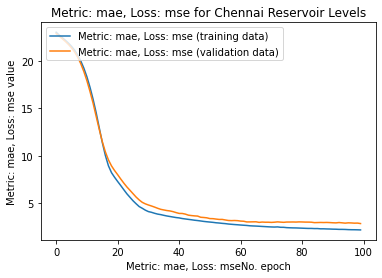

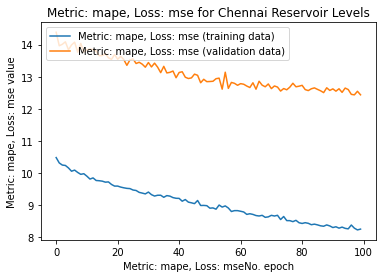

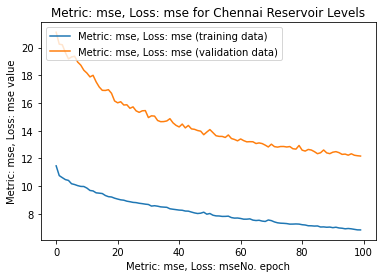

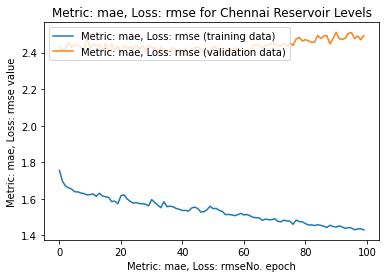

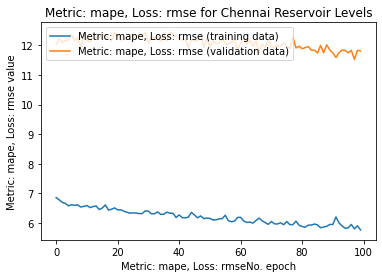

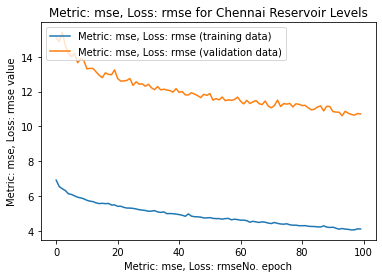

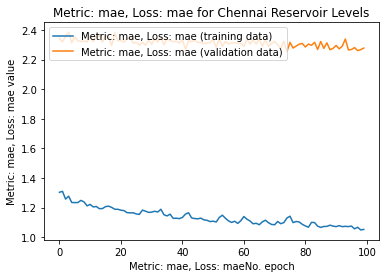

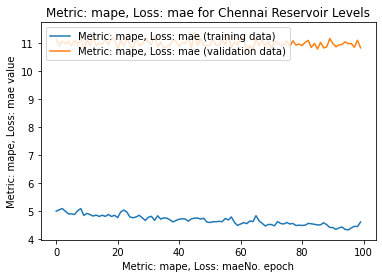

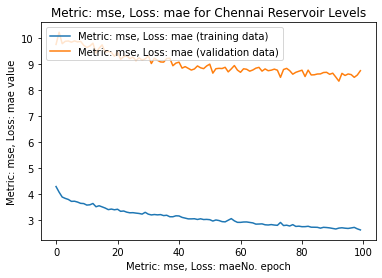

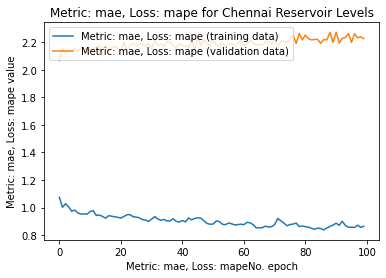

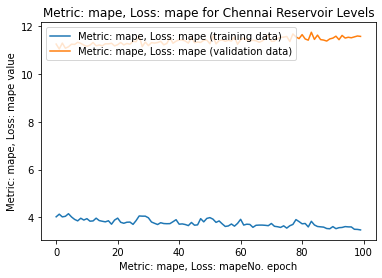

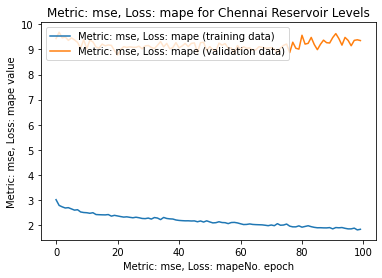

In [26]:
import matplotlib.pyplot as plt

for history in histories:
    # Plot history: MAE
    plt.plot(history[2].history['loss'], label=f'Metric: {history[1]}, Loss: {history[0]}' + ' (training data)')
    plt.plot(history[2].history['val_loss'], label=f'Metric: {history[1]}, Loss: {history[0]}' + ' (validation data)')
    plt.title(f'Metric: {history[1]}, Loss: {history[0]}' + ' for Chennai Reservoir Levels')
    plt.ylabel(f'Metric: {history[1]}, Loss: {history[0]}' + ' value')
    plt.xlabel(f'Metric: {history[1]}, Loss: {history[0]}' + 'No. epoch')
    plt.legend(loc="upper left")
    plt.show()

In [27]:
estimations

[('Metric: mse, Loss: mae', 2.56803822517395, 14.522579193115234),
 ('Metric: mse, Loss: mape', 12.285554885864258, 14.285723686218262),
 ('Metric: mse, Loss: mse', 15.361868858337402, 15.361868858337402),
 ('Metric: rmse, Loss: mae', 2.7107954025268555, 3.8659298419952393),
 ('Metric: rmse, Loss: mape', 13.453692436218262, 3.808229923248291),
 ('Metric: rmse, Loss: mse', 18.7237548828125, 4.3270955085754395),
 ('Metric: mae, Loss: mae', 2.826610565185547, 2.826610565185547),
 ('Metric: mae, Loss: mape', 14.896369934082031, 2.782343626022339),
 ('Metric: mae, Loss: mse', 21.09013557434082, 2.8396503925323486),
 ('Metric: mape, Loss: mae', 2.9369122982025146, 15.959762573242188),
 ('Metric: mape, Loss: mape', 15.658773422241211, 15.658773422241211),
 ('Metric: mape, Loss: mse', 24.066421508789062, 16.45987892150879)]

Наилучшие результаты были получены при использовании метрики MAE с функцией потерь MAE